In [1]:
# http://www.statsmodels.org/stable/examples/notebooks/generated/statespace_structural_harvey_jaeger.html
# https://facebook.github.io/prophet/docs/quick_start.html#python-api
# pip install -i https://pypi.tuna.tsinghua.edu.cn/simple fbprophet 

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [3]:
raw_data = pd.read_csv('Desktop/Python/time series/rides_stats.csv')

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 50 columns):
日期                780 non-null object
未播订单数             780 non-null int64
未播率               780 non-null float64
呼叫订单数             780 non-null int64
呼叫订单需求数           780 non-null int64
每需求呼叫订单数          780 non-null float64
应答订单数             780 non-null int64
单均应答时长            780 non-null float64
应答率               780 non-null float64
应答前取消订单数          780 non-null int64
应答前取消率            780 non-null float64
单均应答前取消时长         780 non-null float64
应答后乘客取消订单数        780 non-null int64
应答后乘客取消率          780 non-null float64
单均应答后乘客取消时长       780 non-null float64
应答后司机取消订单数        780 non-null int64
应答后客服关闭订单数        780 non-null int64
应答后取消订单数          780 non-null int64
应答后取消率            780 non-null float64
应答后取消率(呼叫)        780 non-null float64
应答后乘客取消率(呼叫)      780 non-null float64
应答后司机取消率(呼叫)      780 non-null float64
应答后客服关闭率(呼叫)      780 non-null float64
改派订单数            

In [5]:
raw_data.describe()

,未播订单数,未播率,呼叫订单数,呼叫订单需求数,每需求呼叫订单数,应答订单数,单均应答时长,应答率,应答前取消订单数,应答前取消率,...,成功支付含券订单数,成功支付含券订单占比,订单成功支付券支付金额,支付加小费订单数,乘客APP投诉订单数,APP总投诉订单数,司机APP投诉订单数,APP投诉率,电话总投诉订单数,总投诉订单数
count,7.800000e+02,780.000000,7.800000e+02,7.800000e+02,780.000000,7.800000e+02,780.000000,780.000000,7.800000e+02,780.000000,...,7.800000e+02,780.000000,7.800000e+02,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,1.831207e+06,0.087583,1.951382e+07,1.750714e+07,1.110239,1.745371e+07,12.803570,0.899776,1.813789e+06,0.087550,...,5.877587e+06,0.385286,2.036355e+09,2119.592308,65068.188462,160153.033333,97773.910256,0.010150,12875.887179,170108.605128
std,1.355024e+06,0.053167,4.814442e+06,3.942662e+06,0.040798,3.901710e+06,7.045156,0.054595,1.294880e+06,0.052395,...,2.306937e+06,0.157622,1.073584e+09,3352.638523,30862.473731,68263.893362,55936.851431,0.003740,4285.109103,70492.748606
min,2.239140e+05,0.017477,7.713985e+06,6.140768e+06,1.034865,4.646919e+06,0.000000,0.592864,0.000000e+00,0.000000,...,7.882330e+05,0.113139,1.935635e+08,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.561618e+05,0.051466,1.537465e+07,1.421822e+07,1.082123,1.422231e+07,8.748041,0.880704,9.402318e+05,0.052424,...,4.112818e+06,0.281662,1.192114e+09,145.250000,47670.500000,113188.250000,49527.750000,0.008380,10593.750000,123306.500000
50%,1.482818e+06,0.075817,1.942063e+07,1.735991e+07,1.104702,1.744698e+07,10.733016,0.910164,1.518562e+06,0.078883,...,6.018636e+06,0.356183,1.956869e+09,364.500000,61492.500000,166008.000000,101327.000000,0.010863,13745.000000,177510.500000
75%,2.472206e+06,0.109322,2.300623e+07,2.055597e+07,1.131684,2.064584e+07,14.833096,0.935900,2.375324e+06,0.107501,...,7.444672e+06,0.462326,2.687806e+09,3304.500000,79758.750000,213557.750000,147692.750000,0.012333,15493.000000,224948.750000
max,1.045811e+07,0.362958,3.570356e+07,2.842035e+07,1.334205,2.713379e+07,51.798738,0.973709,1.063102e+07,0.368332,...,1.354915e+07,0.830596,6.953131e+09,27922.000000,151401.000000,299724.000000,208105.000000,0.022417,21896.000000,314313.000000


In [6]:
raw_data.head()

,日期,未播订单数,未播率,呼叫订单数,呼叫订单需求数,每需求呼叫订单数,应答订单数,单均应答时长,应答率,应答前取消订单数,...,成功支付含券订单数,成功支付含券订单占比,订单成功支付券支付金额,支付加小费订单数,乘客APP投诉订单数,APP总投诉订单数,司机APP投诉订单数,APP投诉率,电话总投诉订单数,总投诉订单数
0,07/20/18,5540134,0.181823,30469919,25950325,1.174163,24599906,32.377607,0.807351,5180000,...,6551817,0.300472,2343414855,835,83474,265950,188722,0.012139,11894,274759
1,07/19/18,4192572,0.153070,27389966,23758509,1.152849,22927645,25.895349,0.837082,3924177,...,6113355,0.297502,2119625069,1158,82942,261962,185541,0.012729,10508,269576
2,07/18/18,4495764,0.160330,28040778,24201114,1.158656,23270710,27.925474,0.829888,4212961,...,6410137,0.308246,2230976573,1192,86483,264413,184416,0.012688,10630,272033
3,07/17/18,4809992,0.171147,28104520,24105792,1.165882,22992795,32.389109,0.818117,4471475,...,6309087,0.307498,2213088639,1262,86511,261203,181170,0.012711,10856,269091
4,07/16/18,6344811,0.210983,30072566,25170654,1.194747,23383241,44.819106,0.777561,5966133,...,6514148,0.312845,2342976761,1498,89592,266215,182961,0.012796,10893,274116


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 50 columns):
日期                780 non-null object
未播订单数             780 non-null int64
未播率               780 non-null float64
呼叫订单数             780 non-null int64
呼叫订单需求数           780 non-null int64
每需求呼叫订单数          780 non-null float64
应答订单数             780 non-null int64
单均应答时长            780 non-null float64
应答率               780 non-null float64
应答前取消订单数          780 non-null int64
应答前取消率            780 non-null float64
单均应答前取消时长         780 non-null float64
应答后乘客取消订单数        780 non-null int64
应答后乘客取消率          780 non-null float64
单均应答后乘客取消时长       780 non-null float64
应答后司机取消订单数        780 non-null int64
应答后客服关闭订单数        780 non-null int64
应答后取消订单数          780 non-null int64
应答后取消率            780 non-null float64
应答后取消率(呼叫)        780 non-null float64
应答后乘客取消率(呼叫)      780 non-null float64
应答后司机取消率(呼叫)      780 non-null float64
应答后客服关闭率(呼叫)      780 non-null float64
改派订单数            

In [8]:
raw_data = raw_data.set_index('日期')
raw_data.index = pd.to_datetime(raw_data.index)
raw_data = raw_data.sort_index()

In [9]:
# pick up varibales for modeling
var = ['呼叫订单数', '应答订单数', '完成订单数']
df = raw_data[var]
df.index.name = 'dates'
df.columns = ['requests', 'answers', 'completed']
dates = df.index._mpl_repr()
df.head()

,requests,answers,completed
dates,,,
2016-06-01,14310335,12430765,0
2016-06-02,12312753,11300070,0
2016-06-03,14022149,12472216,0
2016-06-04,13825283,12666084,0
2016-06-05,13110749,12062460,10660446


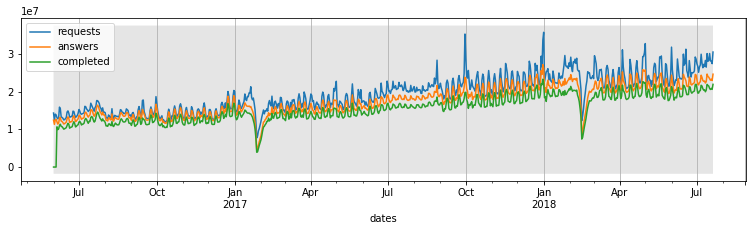

In [10]:
# plot the data
ax = df.plot(figsize=(13,3))
ylim = ax.get_ylim()
ax.xaxis.grid()
ax.fill_between(dates, ylim[0]+1e-5, ylim[1]-1e-5, facecolor='k', alpha=0.1)

In [11]:
# Model specifications
# Unrestricted model, using string specification
unrestricted_model = {
    'level': 'local linear trend',
    'cycle': True,
    'damped_cycle': True,
    'stochastic_cycle': True
}

# The restricted model forces a smooth trend
restricted_model = {
    'level': 'smooth trend',
    'cycle': True,
    'damped_cycle': True,
    'stochastic_cycle': True
}

In [12]:
# request forecast
requests_mod = sm.tsa.UnobservedComponents(df['requests'], **unrestricted_model)
requests_res = requests_mod.fit(method='powell', disp=False)

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [13]:
# answers forecast
answers_mod = sm.tsa.UnobservedComponents(df['answers'], **unrestricted_model)
answers_res = answers_mod.fit(method='powell', disp=False)

answers_restricted_mod = sm.tsa.UnobservedComponents(df['answers'], **restricted_model)
answers_restricted_res = answers_restricted_mod.fit(method='powell', disp=False)

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [14]:
# completed forecast
completed_mod = sm.tsa.UnobservedComponents(df['completed'], **unrestricted_model)
completed_res = completed_mod.fit(method='powell', disp=False)

completed_restricted_mod = sm.tsa.UnobservedComponents(df['completed'], **restricted_model)
completed_restricted_res = completed_restricted_mod.fit(method='powell', disp=False)

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [15]:
print(requests_res.summary())

                            Unobserved Components Results                            
Dep. Variable:                      requests   No. Observations:                  780
Model:                    local linear trend   Log Likelihood              -12272.602
                   + damped stochastic cycle   AIC                          24557.205
Date:                       Sat, 21 Jul 2018   BIC                          24585.130
Time:                               22:54:00   HQIC                         24567.948
Sample:                           06-01-2016                                         
                                - 07-20-2018                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  4.624e-09   4.98e+05   9.28e-15      1

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


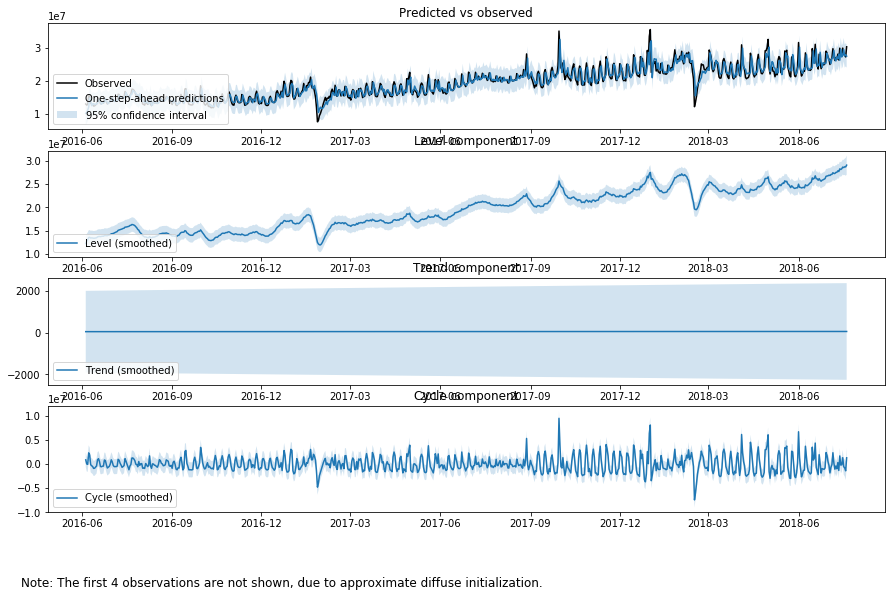

In [16]:
fig = requests_res.plot_components(legend_loc='lower left', figsize=(15, 9))

In [17]:
print(answers_res.summary())

                            Unobserved Components Results                            
Dep. Variable:                       answers   No. Observations:                  780
Model:                    local linear trend   Log Likelihood              -11841.952
                   + damped stochastic cycle   AIC                          23695.905
Date:                       Sat, 21 Jul 2018   BIC                          23723.830
Time:                               22:54:01   HQIC                         23706.648
Sample:                           06-01-2016                                         
                                - 07-20-2018                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   8.85e+10   5.34e-16   1.66e+26      0

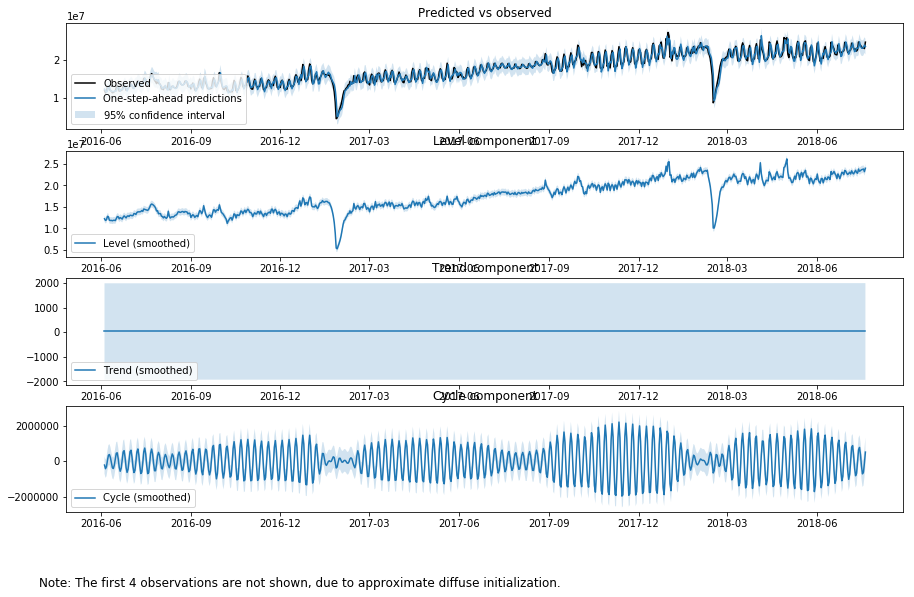

In [18]:
fig = answers_res.plot_components(legend_loc='lower left', figsize=(15,9))

In [19]:
print(completed_res.summary())

                            Unobserved Components Results                            
Dep. Variable:                     completed   No. Observations:                  780
Model:                    local linear trend   Log Likelihood              -11757.828
                   + damped stochastic cycle   AIC                          23527.656
Date:                       Sat, 21 Jul 2018   BIC                          23555.581
Time:                               22:54:01   HQIC                         23538.399
Sample:                           06-01-2016                                         
                                - 07-20-2018                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  9.515e+10   3.16e-16   3.01e+26      0

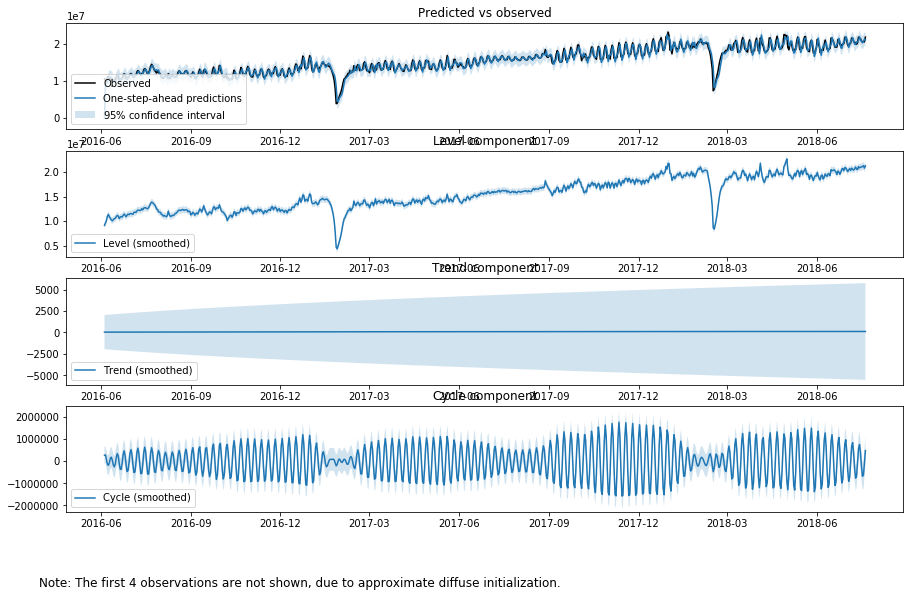

In [20]:
fig = completed_res.plot_components(legend_loc='lower left', figsize=(15, 9))

In [33]:
# request forecast 
requests_fcst = requests_res.predict(end='2018-07-30')

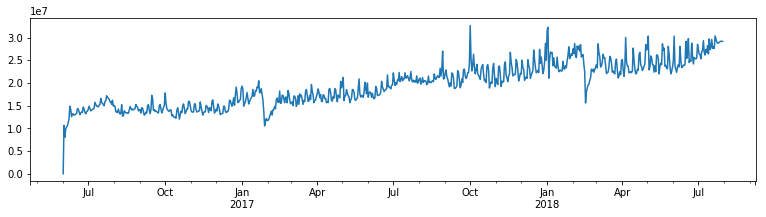

In [34]:
requests_fcst.plot(figsize=(13, 3))

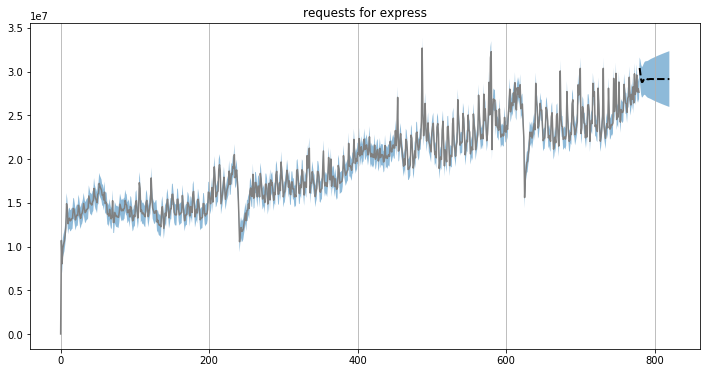

In [36]:
# In-sample one-step-ahead predictions, and out-of-sample forecasts
nforecast = 41
predict = requests_res.get_prediction(end='2018-08-30', dynamic='2018-07-21')
idx = np.arange(len(predict.predicted_mean))
predict_ci = predict.conf_int(alpha=0.5)

# Graph
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()

# Plot
ax.plot(idx[:-nforecast], predict.predicted_mean[:-nforecast], 'gray')
ax.plot(idx[-nforecast:], predict.predicted_mean[-nforecast:], 'k--', linestyle='--', linewidth=2)
ax.fill_between(idx, predict_ci.iloc[:, 0], predict_ci.iloc[:,1], alpha=0.5)

ax.set(title='requests for express');

In [43]:
# answers forecast
answers_fcst = answers_res.predict(end='2018-09-30')

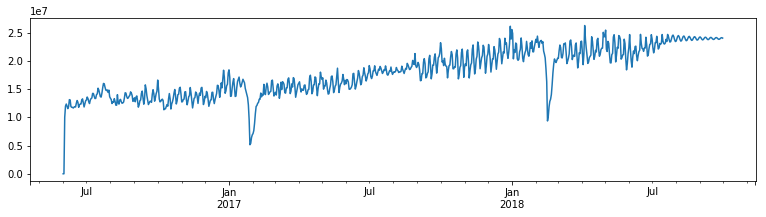

In [44]:
answers_fcst.plot(figsize=(13,3))

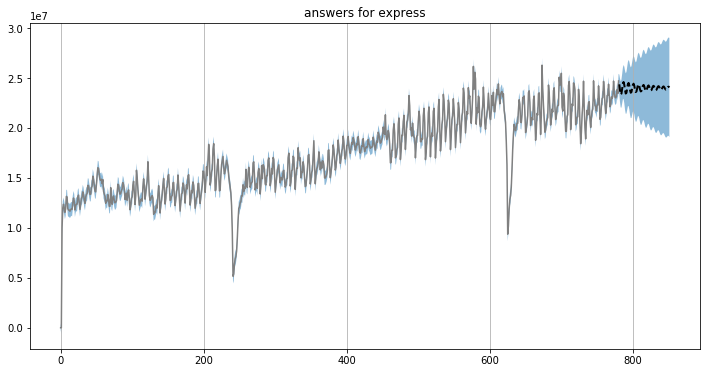

In [42]:
# In-sample one-step-ahead predictions, and out-of-sample forecasts
nforecast = 71
predict_ans = answers_res.get_prediction(end='2018-09-30', dynamic='2018-07-21')
idx = np.arange(len(predict_ans.predicted_mean))
predict_ans_ci = predict_ans.conf_int(alpha=0.5)

# Graph
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()

# Plot
ax.plot(idx[:-nforecast], predict_ans.predicted_mean[:-nforecast], 'gray')
ax.plot(idx[-nforecast:], predict_ans.predicted_mean[-nforecast:], 'k--', linestyle='--', linewidth=2)
ax.fill_between(idx, predict_ans_ci.iloc[:, 0], predict_ans_ci.iloc[:,1], alpha=0.5)

ax.set(title='answers for express');

In [45]:
# completed forecast
completed_fcst = completed_res.predict(end='2018-09-30')

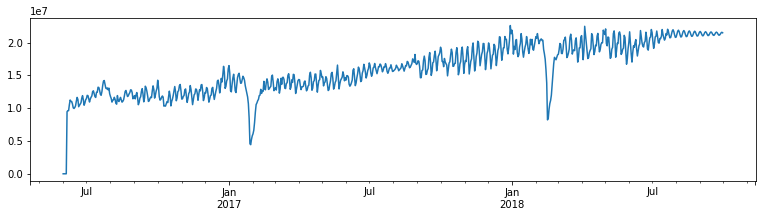

In [46]:
completed_fcst.plot(figsize=(13,3))

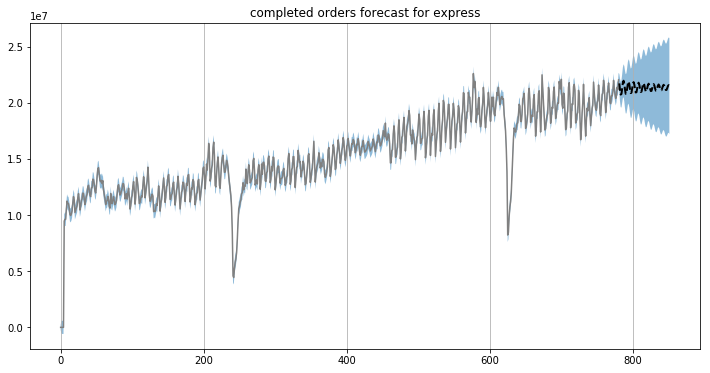

In [47]:
# In-sample one-step-ahead predictions, and out-of-sample forecasts
nforecast = 71
predict_cpl = completed_res.get_prediction(end='2018-09-30', dynamic='2018-07-21')
idx = np.arange(len(predict_cpl.predicted_mean))
predict_cpl_ci = predict_cpl.conf_int(alpha=0.5)

# Graph
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()

# Plot
ax.plot(idx[:-nforecast], predict_cpl.predicted_mean[:-nforecast], 'gray')
ax.plot(idx[-nforecast:], predict_cpl.predicted_mean[-nforecast:], 'k--', linestyle='--', linewidth=2)
ax.fill_between(idx, predict_cpl_ci.iloc[:, 0], predict_cpl_ci.iloc[:,1], alpha=0.5)

ax.set(title='completed orders forecast for express');

In [48]:
# ts forecast with facebook Prophet
from fbprophet import Prophet

In [51]:
df_req = raw_data['呼叫订单数'].reset_index()
df_req.columns = ['ds', 'y']

In [52]:
m = Prophet()
m.fit(df_req)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [54]:
future = m.make_future_dataframe(periods=72)
future.tail()

,ds
847,2018-09-26
848,2018-09-27
849,2018-09-28
850,2018-09-29
851,2018-09-30


In [55]:
req_fcst = m.predict(future)
req_fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
847,2018-09-26,2.712369e+07,2.470337e+07,2.949412e+07
848,2018-09-27,2.704132e+07,2.473177e+07,2.945343e+07
849,2018-09-28,2.960868e+07,2.734868e+07,3.204236e+07
850,2018-09-29,2.960469e+07,2.718416e+07,3.205690e+07
851,2018-09-30,2.883717e+07,2.636655e+07,3.133423e+07


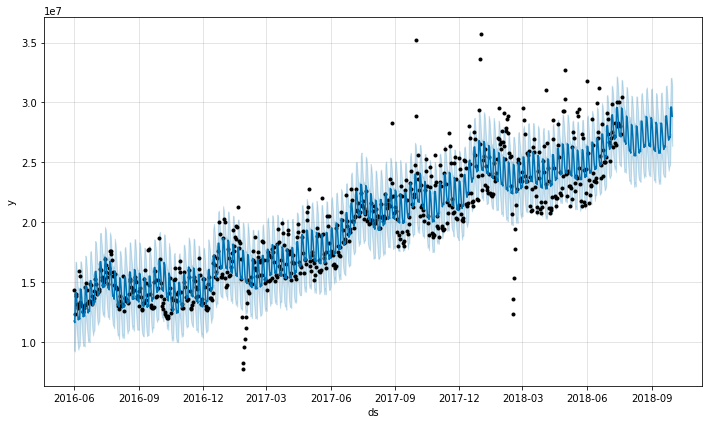

In [56]:
fig1 = m.plot(req_fcst)

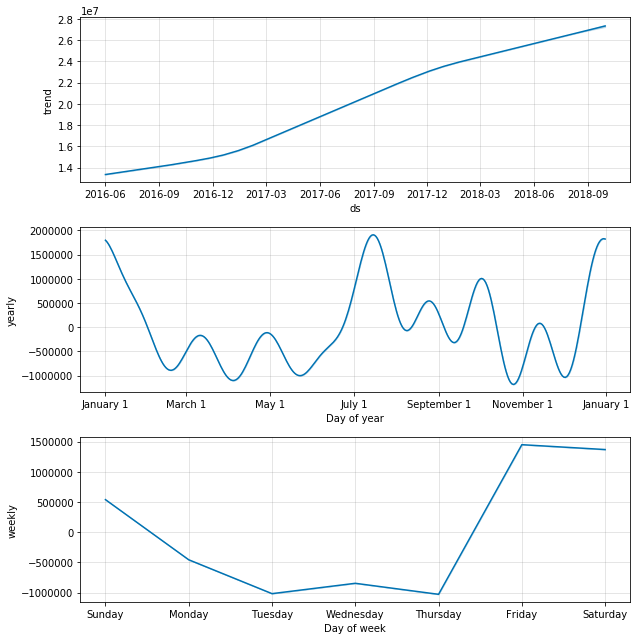

In [57]:
fig2 = m.plot_components(req_fcst)

In [59]:
# forecast answers
df_ans = raw_data['应答订单数'].reset_index()
df_ans.columns = ['ds', 'y']

In [61]:
n = Prophet()
n.fit(df_ans)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [63]:
ans_fcst = n.predict(future)
ans_fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
847,2018-09-26,2.329840e+07,2.132660e+07,2.522220e+07
848,2018-09-27,2.326271e+07,2.141075e+07,2.506844e+07
849,2018-09-28,2.494610e+07,2.309351e+07,2.700747e+07
850,2018-09-29,2.534801e+07,2.344187e+07,2.728317e+07
851,2018-09-30,2.472371e+07,2.276918e+07,2.653235e+07


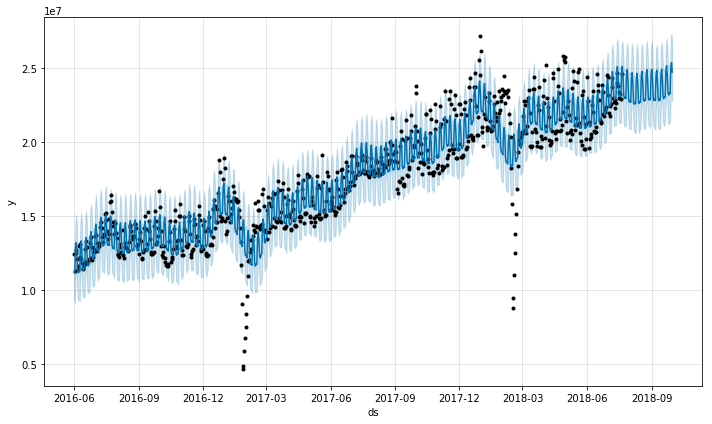

In [64]:
fig3 = n.plot(ans_fcst)

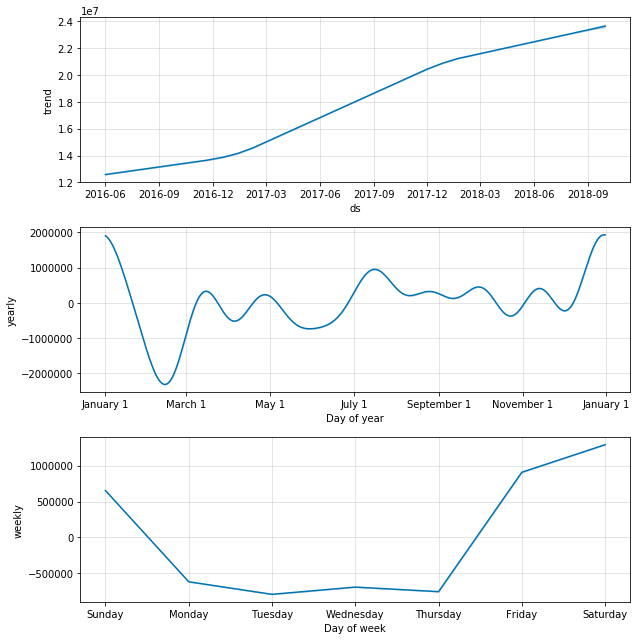

In [65]:
fig4 = n.plot_components(ans_fcst)

In [68]:
# forecast answers
df_cpl = raw_data['完成订单数'].reset_index()
df_cpl.columns = ['ds', 'y']

In [69]:
p = Prophet()
p.fit(df_cpl)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [70]:
cpl_fcst = p.predict(future)
cpl_fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
847,2018-09-26,2.130227e+07,1.934735e+07,2.323069e+07
848,2018-09-27,2.128804e+07,1.938480e+07,2.313860e+07
849,2018-09-28,2.257929e+07,2.077914e+07,2.441026e+07
850,2018-09-29,2.307139e+07,2.125641e+07,2.494513e+07
851,2018-09-30,2.266283e+07,2.077077e+07,2.457576e+07


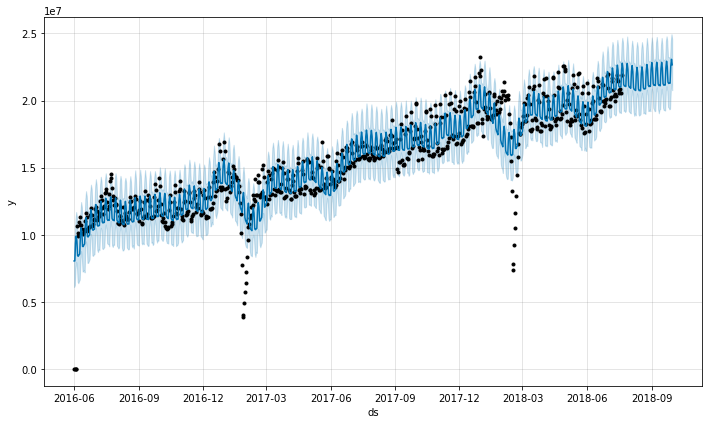

In [71]:
fig5 = p.plot(cpl_fcst)

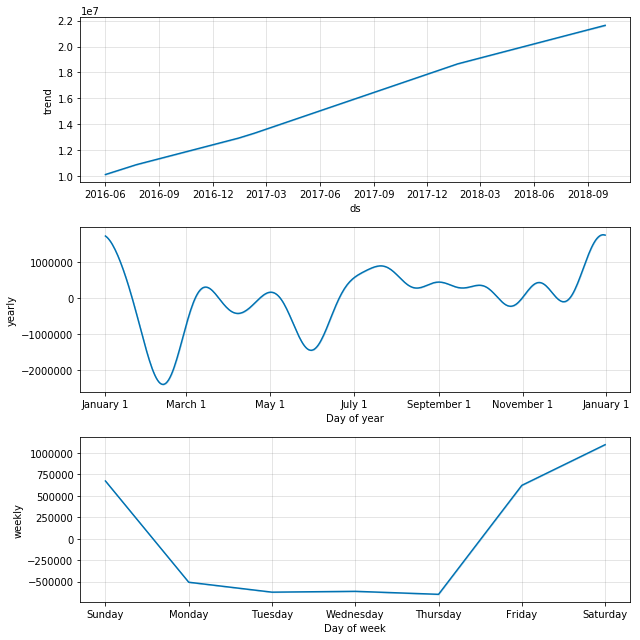

In [72]:
fig6 = p.plot_components(cpl_fcst)